implementation of 2 types of Hierarchical Clustering in Machine Learning

 Agglomerative Clustering,

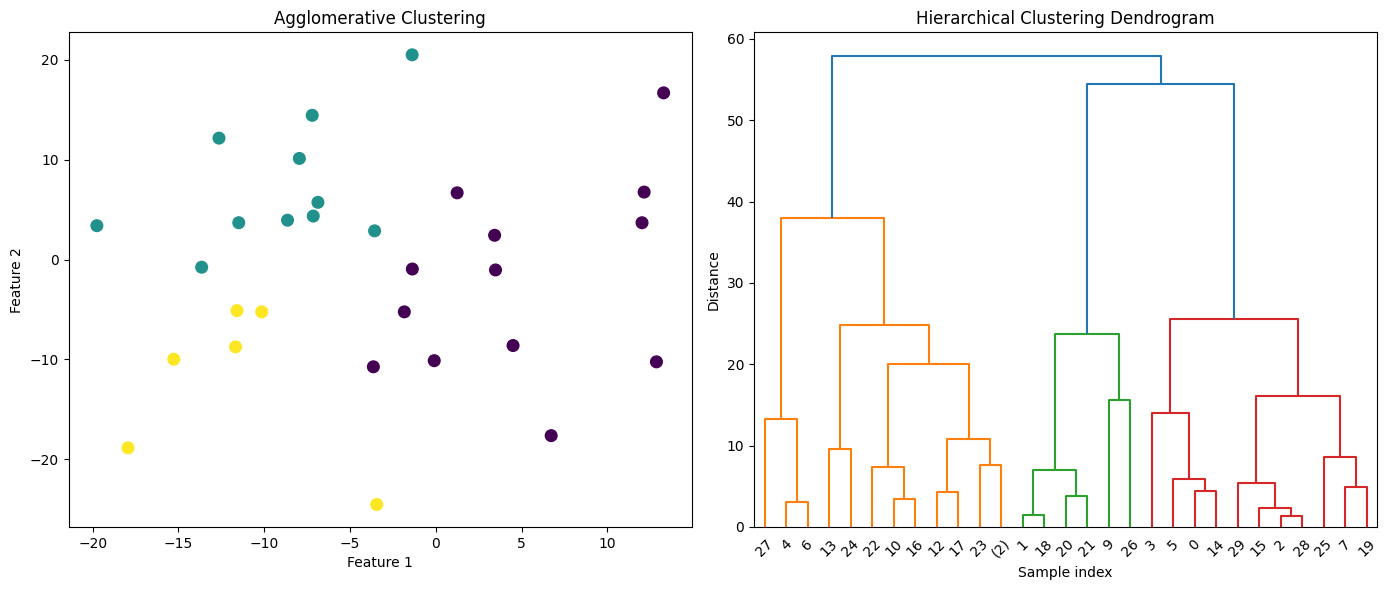

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=10, random_state=42)

clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)


def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")

plt.tight_layout()
plt.show()

Implementing Agglomerative Clustering using Sklearn

comments
Agglomerative Clustering is one of the most common hierarchical clustering technique where each data point starts in its own group (cluster) and step by step the closest clusters are joined together until we reach one big cluster. It's a bottom-up approach meaning:



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [5]:
data = pd.read_csv('/content/CC-GENERAL.csv')

data.drop('CUST_ID', axis=1, inplace=True)

data.fillna(method='ffill', inplace=True)

print(data.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

/tmp/ipython-input-437342773.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [6]:
scaler = StandardScaler()#scaling
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)

X_normalized = pd.DataFrame(X_normalized)

In [7]:
#for reducing dimensionality
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

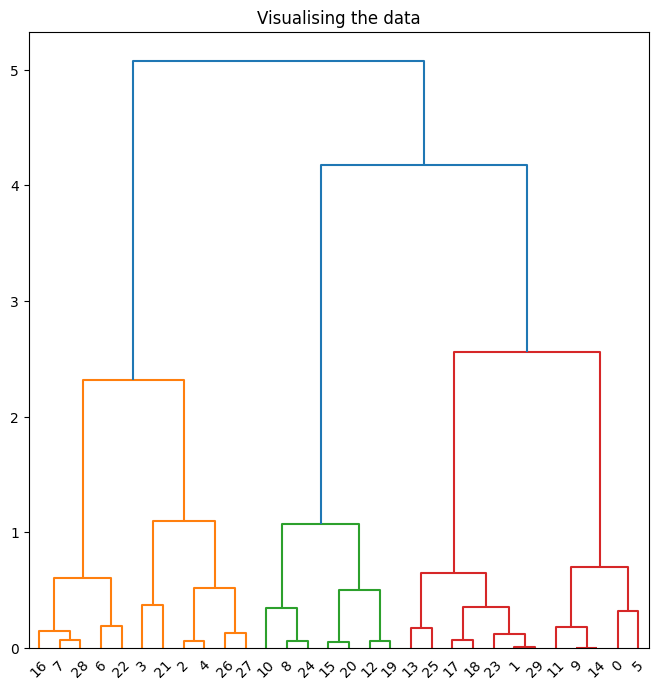

In [8]:
#making dendograms
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

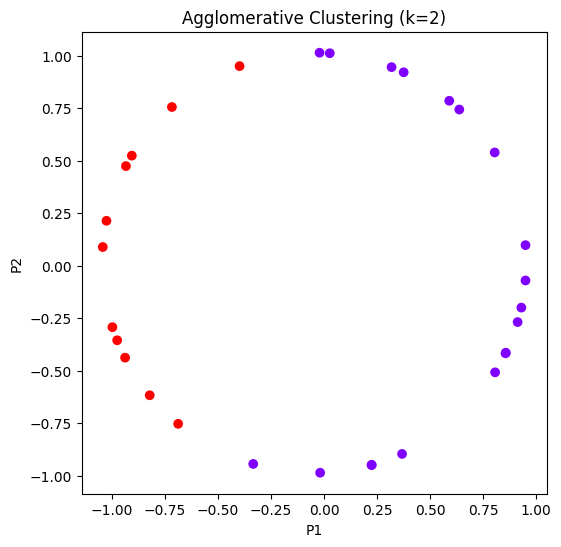

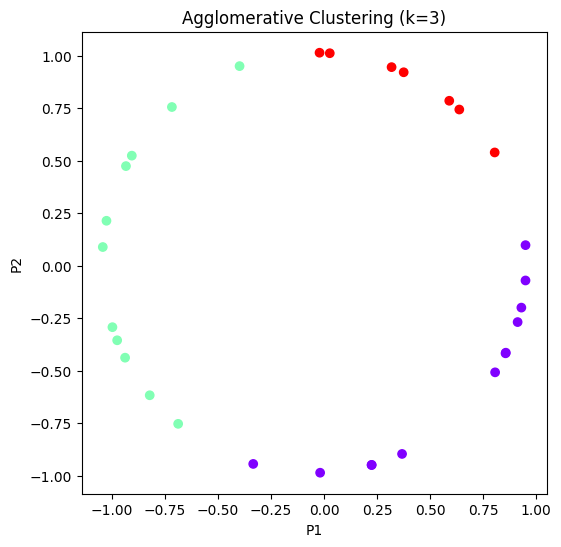

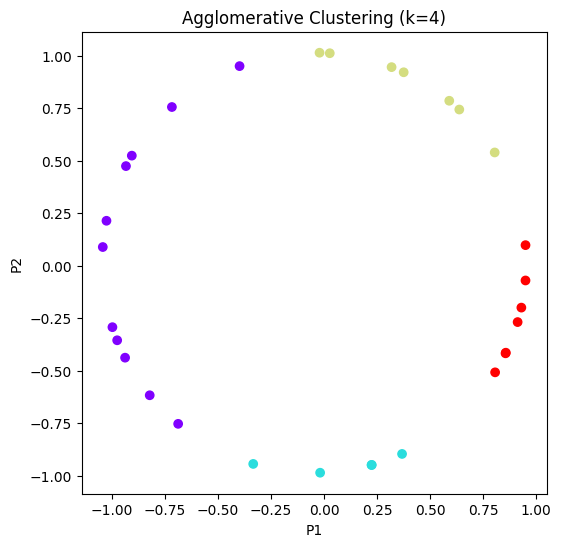

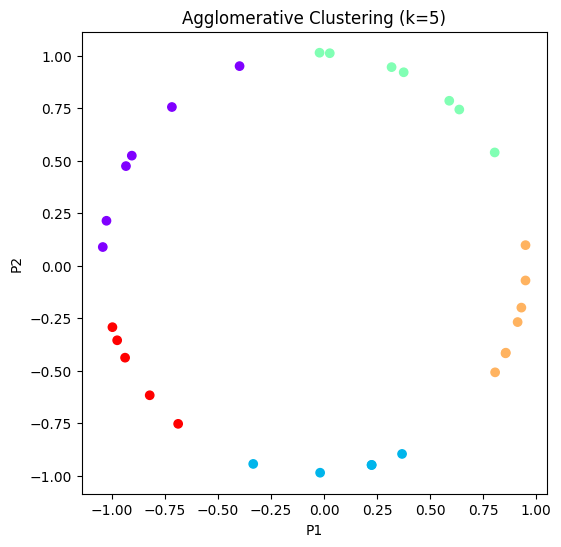

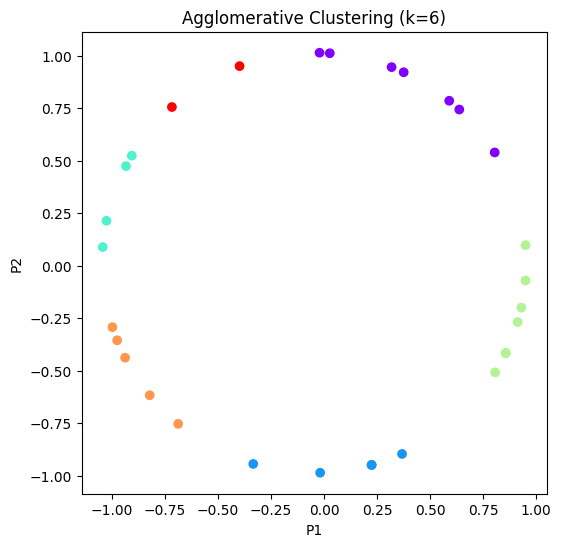

In [10]:
#applying agglomerative algorithm
for k in range(2, 7):  # Try values from 2 to 6
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_principal)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering (k={k})')
    plt.xlabel('P1')
    plt.ylabel('P2')
    plt.show()

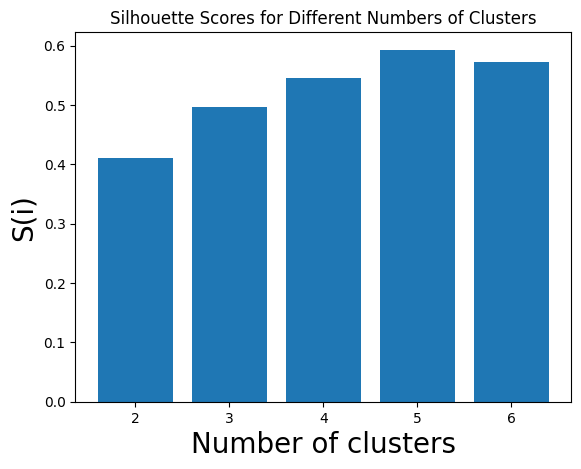

In [12]:
#results visualisation
k_values = range(2, 7) # Use a more descriptive variable name

silhouette_scores = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_principal)
    score = silhouette_score(X_principal, labels)
    silhouette_scores.append(score)

plt.bar(k_values, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.title('Silhouette Scores for Different Numbers of Clusters') # Added a title for clarity
plt.show()

In [ ]:
ffinity Propagation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from itertools import cycle

In [14]:
data = pd.read_csv('/content/Mall_Customers- (2).csv').dropna().drop('CustomerID', axis=1)

features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

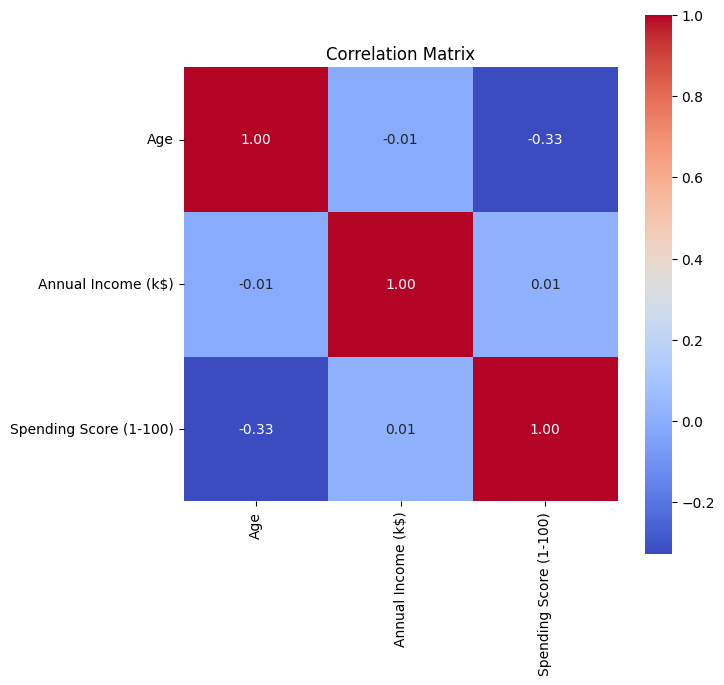

In [15]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",square=True)
plt.title("Correlation Matrix")
plt.show()

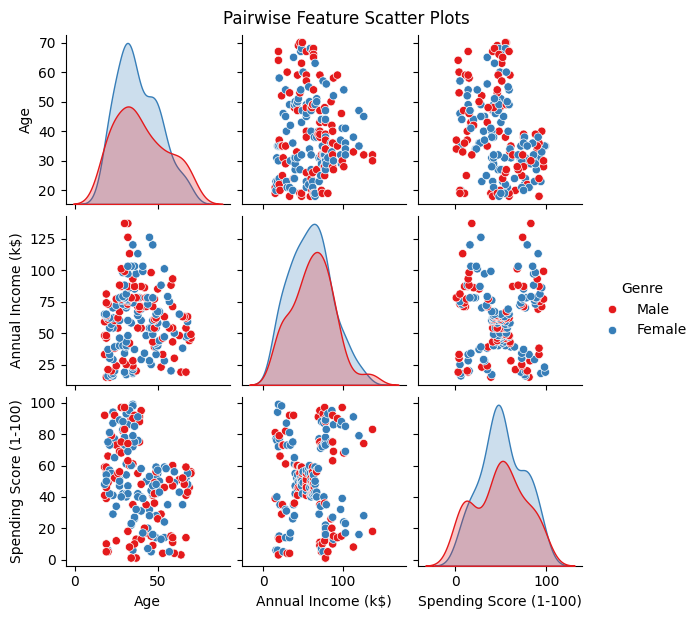

In [16]:
sns.pairplot(data, palette="Set1", hue="Genre", diag_kind="kde", height=2)
plt.suptitle("Pairwise Feature Scatter Plots", y=1.02)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_affinity_propagation.py:140: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


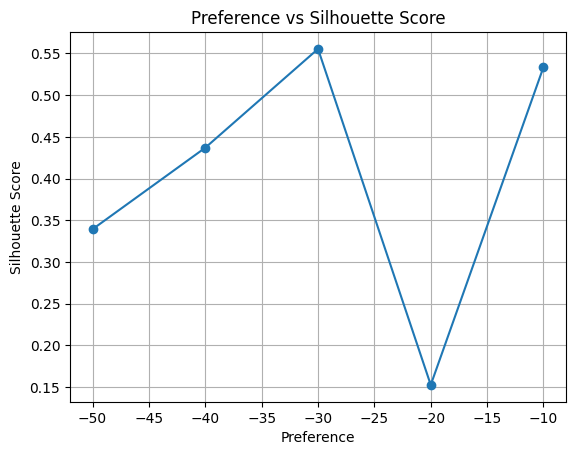

In [17]:
#performance evaluation
Preference = [-50, -40, -30, -20, -10]
silhouette_scores = []

for preference in Preference:
    model = AffinityPropagation(preference=preference, random_state=42)
    model.fit(X_std)

    # Evaluate only if more than one cluster is found
    if len(np.unique(model.labels_)) > 1:
        score = metrics.silhouette_score(X_std, model.labels_)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(np.nan)

plt.plot(Preference, silhouette_scores, marker='o')
plt.title('Preference vs Silhouette Score')
plt.xlabel('Preference')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [18]:
#applying algorithm
af = AffinityPropagation(preference=-30, max_iter=50, damping=0.7,
                         random_state=42, convergence_iter=20).fit(X_std)

cluster_labels = af.labels_
print("Cluster labels:", cluster_labels)

Cluster labels: [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 2 1 2 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]


In [19]:
silhouette_score = metrics.silhouette_score(X_std, cluster_labels)
print(f"Silhouette Score: {silhouette_score:.4f}")

Silhouette Score: 0.5530


/tmp/ipython-input-1045672442.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(cluster_center[0], cluster_center[1], 'o',
/tmp/ipython-input-1045672442.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)


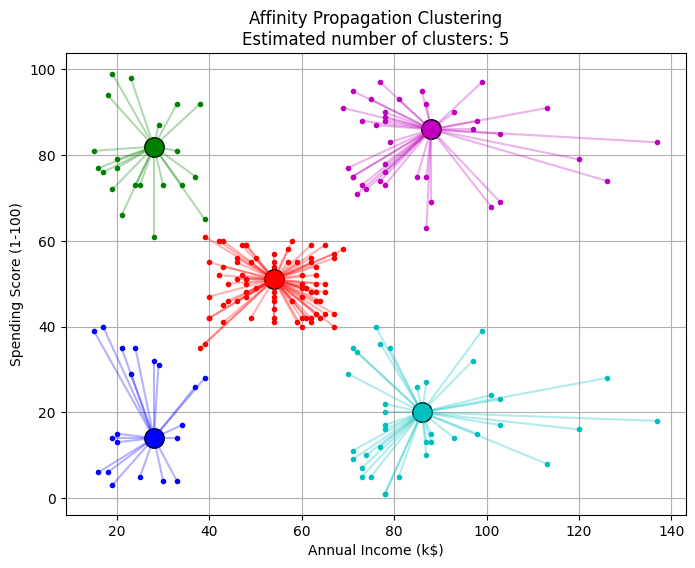

In [20]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmyk')

n_clusters_ = len(af.cluster_centers_indices_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X.iloc[cluster_centers_indices[k]]

    plt.plot(X.iloc[class_members, 0], X.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=col, markeredgecolor='k', markersize=14)

    for x in X.iloc[class_members].values:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.3)

plt.title(f'Affinity Propagation Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()